## Department of Computer Science, University of York
### DATA: Introduction to Data Science

## Task 1: Domain Analysis  (5 marks)

Given the business domain and the data overview presented (in the assessment paper), provide a brief description of

* the business problem and its significance to the relevant sector;
* the link between the business problem and the field of data science;
* the main areas of investigation; and
* potential ideas and solutions.


**Word Limit:** 300 words

**Write your answer here (text cell(s) to be used, as appropriate)**

The business is a well-established bank which provides several services to its customers to allow them to manage accounts and many other financial needs. It is important that their offerings are competitive against rival businesses and provide the best possible service to their customers, and accurate and decisive decision making are a part of this.

When it comes to accurate decision making, data science plays a key role. It allows you to look at the facts of the matter and present them in more interpretable ways using data visualisation and statistics. Through the analysis of data provided by the bank, data science can provide insights in key areas, ensure decisions are fair and supported by facts, and present the data transparently, allowing all stakeholders to easily understand it and make the correct decisions.

The data contains records of its clients, which includes a sizable selection of data about the city they inhabit. Investigating links between the city data and customer behaviour may provide trends and insights into what types of cities are best for the bank to focus on expanding their services into. 

It also contains information about the account, such as the creation date. This could be important information when considering a rewards system for loyal customers.

The transaction data could be used to identify loyal and high-value customers, as it contains the value of the transaction, the remaining balance and the date of the transaction. Additionally, clients with large standing orders can be identified using the data, which also would help track high-value customers.

Data tracking the financial habits and trustworthiness of clients can be used to determine whether the bank should give them a loan or a credit card. Usage data can be used when considering advertising the bank to potential new customers.

## Task 2: Database Design (25 marks)


Having understood the business domain, present a conceptual design in the form of an entity-relationship (ER) model that would be helpful in creating a database for the bank.

The bank data currently exists in the form of a csv file called *BankRecords.csv*, provided on VLE (path given in page 5, assessment paper). This file has all the existing records. The table available in the csv file is unnormalised. The information about its different columns is given in Tables 1 and 2 (in the assessment paper).

Following the standard principles of database normalisation, normalise the given table (*BankRecords.csv*) to a database schema that has minimum redundancies. Then, using the designed schema, create an SQLite database.

Your answer should include the SQL statements needed to accomplish this step. Your submission should also include the created SQLite database file.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* The designated keys, existing relationships, and identified functional dependencies;
* The steps followed and justifications for the decisions made.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code/SQL statements or figures.

### ER Diagram

![ER Diagram](img/ERDiagram.png)

### Database Schema

Dataset has no multiple valued attributes, so in 1NF. Also, it has no specified primary keys so therefore no composite primary keys for 2NF from the outset.

![Database Schema](img/schema.png)

This is the normalised database schema. *italics* represent foreign keys, <ins>underlines</ins> represent primary keys. "partner_id" replaces partnerAccount and recipientAccount in Transaction and StandingOrder respectively, foreign key to table "banks" to remove transitive dependency of the bank's code on the partner account id.

### SQLite Database Creation

I imported BankRecords.csv into DB Browser for SQLite as the table BankRecords. The types were interpreted by the importer accurately enough to be automatically casted by the INSERT INTO statements, but I had to manually cast card_id from TEXT to INTEGER for the GROUP BY. I then executed the following SQL statements and used the Tools -> Compact Database... to correct the filesize.

#### SQL Statements

CREATE TABLE "accounts" (
  "account_id" INTEGER PRIMARY KEY,
  "frequency" TEXT,
  "creation_date" INTEGER
);

INSERT INTO accounts
SELECT account_id, frequency, creation_date
FROM BankRecords
GROUP BY account_id;

CREATE TABLE "loans" (
  "loan_id" INTEGER PRIMARY KEY,
  "loan_date" INTEGER,
  "loan_amount" INTEGER,
  "loan_duration" INTEGER,
  "loan_payments" INTEGER,
  "loan_status" TEXT,
  "account_id" INTEGER,
  FOREIGN KEY (account_id) REFERENCES accounts(account_id)
);

INSERT INTO loans
SELECT loan_id, loan_date, loan_amount, loan_duration, loan_payments, loan_status, account_id
FROM BankRecords WHERE loan_id IS NOT NULL
GROUP BY loan_id;

CREATE TABLE "cities" (
  "a1" INTEGER PRIMARY KEY,
  "a2" TEXT,
  "a3" TEXT,
  "a4" INTEGER,
  "a5" INTEGER,
  "a6" INTEGER,
  "a7" INTEGER,
  "a8" INTEGER,
  "a9" INTEGER,
  "a10" REAL,
  "a11" INTEGER,
  "a12" REAL,
  "a13" REAL,
  "a14" INTEGER,
  "a15" INTEGER,
  "a16" INTEGER
);

INSERT INTO cities
SELECT a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16
FROM BankRecords
GROUP BY a1;

CREATE TABLE "clients" (
  "client_id" INTEGER PRIMARY KEY,
  "birth_number" INTEGER,
  "a1" INTEGER,
  FOREIGN KEY (a1) REFERENCES cities(a1)
);

INSERT INTO clients
SELECT client_id, birth_number, a1
FROM BankRecords
GROUP BY client_id;

CREATE TABLE "disponents" (
  "disp_id" INTEGER PRIMARY KEY,
  "client_id" INTEGER,
  "account_id" INTEGER,
  "disp_type" TEXT,
  FOREIGN KEY (client_id) REFERENCES clients(client_id),
  FOREIGN KEY (account_id) REFERENCES accounts(account_id)
);

INSERT INTO disponents
SELECT disp_id, client_id, account_id, disp_type
FROM BankRecords
GROUP BY disp_id;

CREATE TABLE "cards" (
  "card_id" INTEGER,
  "card_type" TEXT,
  "card_issued" TEXT,
  "disp_id" INTEGER,
  FOREIGN KEY (disp_id) REFERENCES disponents(disp_id)
);

INSERT INTO cards
SELECT card_id, card_type, card_issued, disp_id
FROM BankRecords WHERE card_id IS NOT NULL
GROUP BY CAST(card_id AS INT);

CREATE TABLE "banks" (
    "partner_id" INTEGER PRIMARY KEY,
    "bank_code" TEXT
);

INSERT INTO banks
SELECT partner_account, partner_bank
FROM BankRecords WHERE partner_account IS NOT NULL
GROUP BY partner_account;

INSERT INTO banks
SELECT account_to, bank_to FROM BankRecords WHERE account_to NOT IN (SELECT partner_id FROM banks)
GROUP BY account_to;

CREATE TABLE "orders" (
  "order_id" INTEGER PRIMARY KEY,
  "partner_id" INTEGER,
  "order_amount" REAL,
  "payment_type" TEXT,
  "account_id" INTEGER,
  FOREIGN KEY (account_id) REFERENCES accounts(account_id),
  FOREIGN KEY (partner_id) REFERENCES banks(partner_id)
);
INSERT INTO ORDERS
SELECT order_id, account_to, order_amount, payment_type, account_id
FROM BankRecords WHERE order_id IS NOT NULL
GROUP BY order_id;

CREATE TABLE "transactions" (
  "trans_id" INTEGER PRIMARY KEY,
  "trans_date" INTEGER,
  "trans_type" TEXT,
  "operation" TEXT,
  "trans_amount" REAL,
  "balance" REAL,
  "trans_detail" TEXT,
  "partner_id" INTEGER,
  "account_id" INTEGER,
  FOREIGN KEY (account_id) REFERENCES accounts(account_id),
  FOREIGN KEY (partner_id) REFERENCES banks(partner_id)
);

INSERT INTO transactions
SELECT trans_id, trans_date, trans_type, operation, trans_amount, 
balance, trans_detail, partner_account, account_id
FROM BankRecords
GROUP BY trans_id;

DROP TABLE BankRecords;

## Task 3: Research Design (25 Marks)

Using the database designed in Task 2, design and implement **five** potential modelling solutions to achieve the aim of the Data Intelligence team. You need to provide clear justifications about the techniques selected in the context of the 'problem in hand'. Your design must consist of a combination of inferential statistics, supervised learning algorithms, and unsupervised learning algorithms, and include **at least one** of those techniques. Finally, your modelling solutions should be of sufficient complexity, combining information from multiple tables from the database built in Task 2, as appropriate. Your answer should clearly show the queries made to the database. If amendments are made to the database, the commands should be clearly included in your answer.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* Any data processing and data integrity steps you would undertake to make the data fit for purpose;
* Which technique(s) you would apply for each solution and why;
* An evaluation of the techniques applied in terms of the accuracy of their results (or any other suitable evaluation measure);
* Algorithmic parameters should be adequately stated and discussed;
* A discussion of ethical considerations arising from the solutions selected.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

From an ethical standpoint, the data is anonymous and there is not a lot of data which could be used to identify people. The only information on clients is their birthdate and city information, which should be considered.

In [1]:
### Write your answer here (code cell(s) to be used, as appropriate)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# open sql connection
con=sqlite3.connect("BankRecords.db")
cursor=con.cursor()

In [2]:
from datetime import date, timedelta

# Helper function to convert years in database's format to datetimes, useful for data processing
# pd.to_datetime tries to be smart about milenium predicting, but this data is all from before 2000
def corrected_to_ordinal(row):
    row = pd.to_datetime(row, format="%y%m%d")

    # not necessary for every column, but inexpensive check
    if row.year >= 2000:
        row -= timedelta(days=365.25 * 100) # 365.25 * 100 is 100 years
    return row.toordinal()


### Modelling Solution 1

In [3]:
from scipy.stats import gaussian_kde

data = pd.read_sql("SELECT creation_date FROM accounts", con)

# Convert from YYMMDD to ordinal time using helper function.
X = data["creation_date"].apply(corrected_to_ordinal).to_numpy()

# Model generation. Parameters are X and the bandwidth estimator, which is Scott's rule.
kde = gaussian_kde(X, bw_method="scott")

p = np.linspace(np.min(X), np.max(X)) # points, for plotting
e = kde.evaluate(p) # evaluation

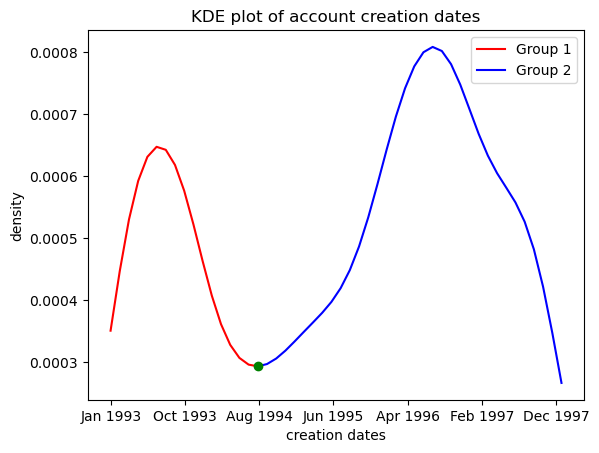

In [4]:
from datetime import date
from scipy.signal import argrelextrema

fig, ax = plt.subplots()

# Get the minima.
mi = argrelextrema(e, np.less)[0]

plt.plot(p[:mi[0]+1], e[:mi[0]+1], "r", label="Group 1") # start to minima
plt.plot(p[mi[0]:], e[mi[0]:], "b", label="Group 2") # minima to end
plt.plot(p[mi], e[mi], 'go') # minima

# Convert ordinals back to datetimes for the x axis to be more understandable.
x_ticks = pd.Series(np.arange(np.min(X) + 1, np.max(X), 300))
x_ticklabels = pd.to_datetime(x_ticks.apply(date.fromordinal)).dt.strftime("%b %Y")

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)

plt.title("KDE plot of account creation dates")
plt.xlabel("creation dates")
plt.ylabel("density")
plt.legend()
plt.show()

In [5]:
mi_ordinal = int(p[mi[0]])
print("minima at: {0:%b} {0:%d} {0:%Y}".format(date.fromordinal(mi_ordinal)))

minima at: Aug 19 1994


This is a KDE plot of the account creation dates of the bank. It provides insight into the density of account creation dates, which is useful for considering loyalty benefits. Using the minima at Aug 19 1994 we can split clients into two groups. Alternatively could use K-means clustering for the same purpose, but that is more purposed towards 2D and above data, whereas this suits 1D data more.

### Modelling Solution 2

In [6]:
from datetime import date, timedelta

# Data processing in this SQL statement includes subtracting 5000 from the birth number if it has a month over 12 due
# to how the data stores the birth number differently for women and men.

df = pd.read_sql('''
SELECT balance,
CASE
    WHEN CAST(substr(clients.birth_number, 3,2) AS INT) > 12 THEN clients.birth_number - 5000
    ELSE clients.birth_number
END birth_number
FROM transactions
LEFT JOIN disponents ON transactions.account_id=disponents.account_id
LEFT JOIN clients ON disponents.client_id=clients.client_id
GROUP BY clients.client_id
''', con)

# Convert from YYMMDD to ordinal time using helper function.
df["ordinal"] = df["birth_number"].apply(corrected_to_ordinal)

# Remove clients with a balance under 1100 so higher value accounts are focused on by the model.
df = df[df["balance"] > 1100]

df = df[["ordinal", "balance"]].copy()

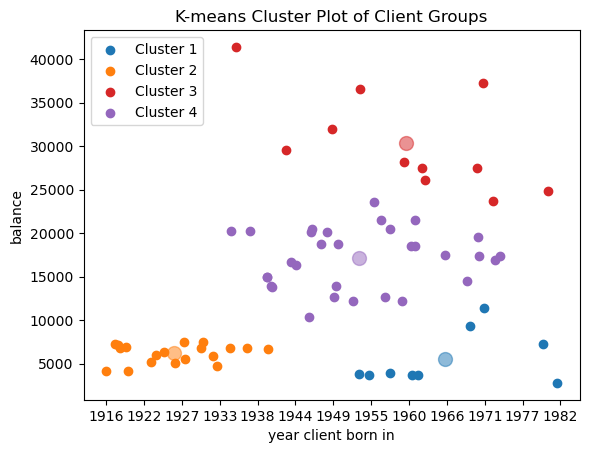

In [7]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots()

# random_state set to 0 to ensure when rerun the groups are the same.
# k/n_clusters = 4, value selected, which is a downside of K-means.
kmeans = KMeans(n_clusters = 4, n_init="auto", random_state=0) 

# Fit the model to the input data, the ordinal birth number and the balance.
cluster_data = kmeans.fit_predict(df)
centers = kmeans.cluster_centers_

colours = ["tab:blue", "tab:orange", "tab:red", "tab:purple"]

for i, colour in enumerate(colours):
    f = df[cluster_data == i].to_numpy()
    plt.scatter(f[:, 0], f[:, 1], label = f"Cluster {i + 1}", color=colour)
    plt.scatter(centers[i, 0], centers[i, 1], c = colour, s = 100, alpha = 0.5)

# Convert ordinals back to datetimes for the x axis to be more understandable.
x_ticks = pd.Series(np.arange(df["ordinal"].min() + 1, df["ordinal"].max() + 2000, 2000))
x_ticklabels = pd.to_datetime(x_ticks.apply(date.fromordinal))

ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels.dt.strftime("%Y"))

plt.title("K-means Cluster Plot of Client Groups")
plt.xlabel("year client born in")
plt.ylabel("balance")
plt.legend()
plt.show()

This is a K-means plot comparing the client account balance to their birth number. 4 clusters are identified, providing insights on how the bank may choose to target their customer service.

The year the client is born in is potentially sensitive information, but on its own is not an ethical risk for this model. How this model is used could potentially result in harm, due to the clusters showing different patterns for different ages, so it is important the bank uses this data to understand and help their clients.

### Modelling Solution 3

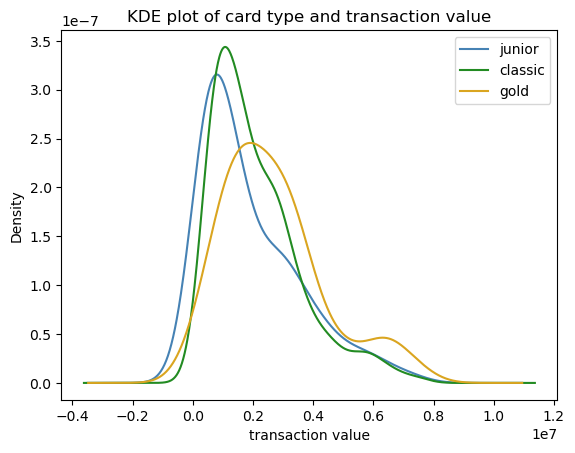

In [8]:
# ANOVA t test to check value between different credit card holder types
fig, ax = plt.subplots()

# trans_sum is the sum of the transaction amounts.
df = pd.read_sql('''
SELECT cards.card_type, sum(trans_amount) AS trans_sum FROM transactions
INNER JOIN disponents ON transactions.account_id = disponents.account_id 
INNER JOIN cards ON disponents.disp_id = cards.disp_id
GROUP BY cards.card_id
''', con)

# split data into the different card types
junior = df[df["card_type"] == "junior"]["trans_sum"]
classic = df[df["card_type"] == "classic"]["trans_sum"]
gold = df[df["card_type"] == "gold"]["trans_sum"]

junior.plot(kind="kde", label="junior", color="steelblue", ax=ax)
classic.plot(kind="kde", label="classic", color="forestgreen", ax=ax)
gold.plot(kind="kde", label="gold", color="goldenrod", ax=ax)


ax.set_title("KDE plot of card type and transaction value")

plt.xlabel("transaction value")
plt.legend()
plt.show()

$H_0: X_{junior} = X_{classic} = X_{gold}$

$H_1: \exists i,j \in \{junior, classic, gold\} \bullet (i\neq j) \land (X_i \neq X_j)$

In [9]:
import scipy.stats as stats

junior = junior.to_numpy()
classic = classic.to_numpy()
gold = gold.to_numpy()

alpha = 0.05

groups = 3
total_size = junior.size + classic.size + gold.size

dof_M = groups - 1
dof_R = total_size - groups

f_crit = stats.f.ppf(1 - alpha, dof_M, dof_R)

f, pvalue = stats.f_oneway(junior, classic, gold)

if f > f_crit: 
    print(f"H_0 rejected, exceeds the critical value ({f}>{f_crit})")
else:
    print(f"H_0 not rejected, does not exceed the critical value ({f}=<{f_crit}")


H_0 rejected, exceeds the critical value (7.154472245560138>3.00584994177774)


$H_0$ is rejected. Therefore, $\exists i,j \in \{junior, classic, gold\} \bullet (i\neq j) \land (X_i \neq X_j)$

In [10]:
# Bonferroni correction for overtesting
bonf = alpha / 3

tjc = stats.ttest_ind(junior, classic)
tjg = stats.ttest_ind(junior, gold)
tcg = stats.ttest_ind(classic, gold)

print(f"adjusted p crit: {bonf}")
print(f"junior compared to classic: {tjc[1]}")
print(f"junior compared to gold: {tjg[1]}")
print(f"classic compared to gold: {tcg[1]}")

adjusted p crit: 0.016666666666666666
junior compared to classic: 0.18896609405391696
junior compared to gold: 0.0009401893621435096
classic compared to gold: 0.0007589039036969504


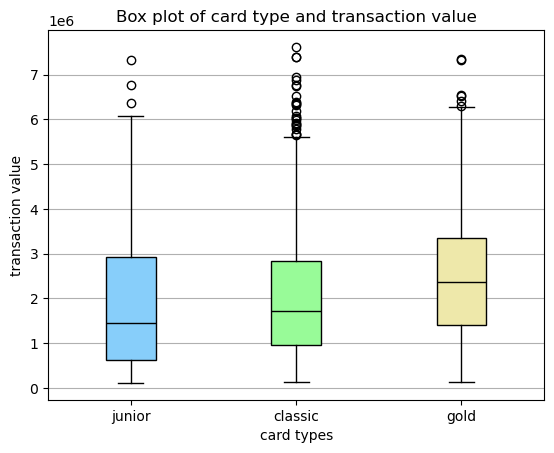

In [11]:
fig, ax = plt.subplots()

labels = ["junior", "classic", "gold"]
colours = ["lightskyblue", "palegreen", "palegoldenrod"]

boxplot = ax.boxplot([junior, classic, gold], patch_artist=True) #, notch=True)

for colour, patch, median in zip(colours, boxplot["boxes"], boxplot["medians"]):
     patch.set_facecolor(colour)
     median.set_color("black")

ax.set_title("Box plot of card type and transaction value")
ax.set_xticklabels(labels)
ax.yaxis.grid(True)

plt.xlabel("card types")
plt.ylabel("transaction value")

plt.show()

ANOVA test to determine whether theres difference in the mean transaction value of each credit card type, which was found to be significant at the 0.05 level. Post hoc tests with a Bonferroni correction show the difference is between junior/gold, and classic/gold highlighting gold to be statistically significant compared to the other card types.

The grouping of the data means there is not sensitive information that is identifiable. The use of statistical testing reduces the chance of bias.

### Modelling Solution 4

In [12]:
from scipy import stats

df = pd.read_sql("SELECT trans_date, trans_type FROM transactions", con)

# convert this date from YYMMDD to datetime.
df["trans_date"] = pd.to_datetime(df["trans_date"], format="%y%m%d")

# get seasons from month
# 0 = winter, 1 = spring, 2 = summer, 3 = autumn
season_map = np.array(["winter", "spring", "summer", "autumn"])
seasons = ((df["trans_date"].dt.month % 12) // 3).to_numpy()

seasons = season_map[seasons]

contingency = pd.crosstab(seasons, df["trans_type"])

contingency

trans_type,Credit,Withdrawal,Withdrawal in cash
row_0,,,
autumn,109081,156887,4716
spring,94847,133384,4018
summer,102987,150911,4373
winter,98168,193389,3559


$H_0: \text{There is no difference in the frequency of transaction types in different seasons.}$

$H_1: \text{There is a difference in the frequency of transaction types in different seasons.}$

In [13]:
chi2, pvalue, dof, expected = stats.chi2_contingency(contingency)

alpha = 0.0025

chi2_crit = stats.chi2.ppf(1-alpha, dof)

if chi2 > chi2_crit: 
    print(f"H_0 rejected, exceeds the critical value ({chi2}>{chi2_crit})")
else:
    print(f"H_0 not rejected, does not exceed the critical value ({chi2}=<{chi2_crit}")


H_0 rejected, exceeds the critical value (5200.8608889512525>20.249402051490126)


$H_0$ is rejected, There is a difference in the frequency of transaction types in different seasons.

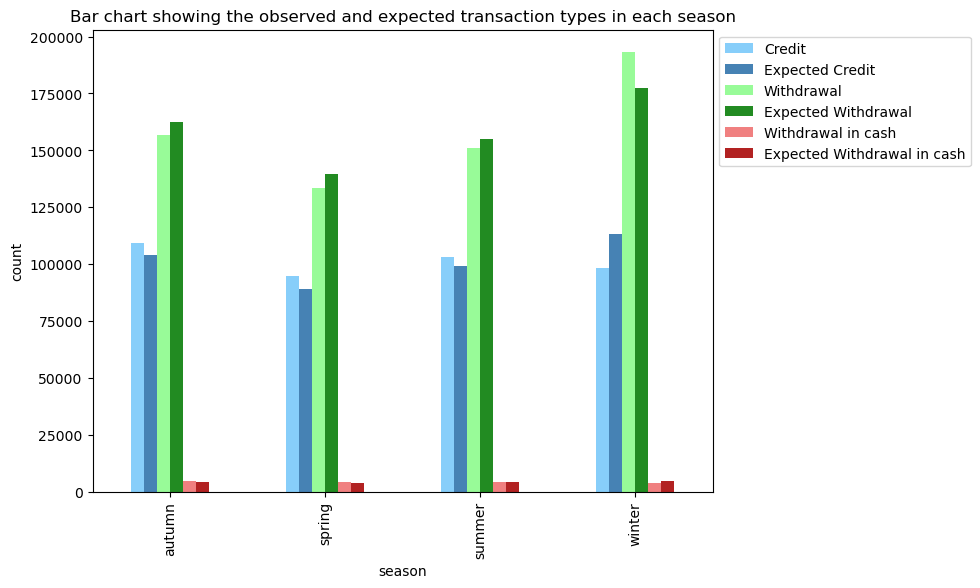

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

# inserting the expected into the copy of the table, for plotting.
new = contingency.copy()
new.insert(1, "Expected Credit", expected[:, 0].reshape(-1, 1))
new.insert(3, "Expected Withdrawal", expected[:, 1].reshape(-1, 1))
new.insert(5, "Expected Withdrawal in cash", expected[:, 2].reshape(-1, 1))

# using similar colours to easier visualise observed/expected
colours = ["lightskyblue", "steelblue", "palegreen", "forestgreen", "lightcoral", "firebrick"]

new.plot.bar(ax=ax, color=colours)
ax.legend(bbox_to_anchor=(1,1))

plt.title("Bar chart showing the observed and expected transaction types in each season")
plt.xlabel("season")
plt.ylabel("count")

plt.show()

In [15]:
# post hoc tests as we want to show where the results differ
from itertools import combinations

# generates the combinations automatically
combs = list(combinations(contingency.index, 2))

bonf = alpha / len(combs)

print(f"adjusted p crit: {bonf}")
for c in combs:
    new_contingency = contingency[(contingency.index == c[0]) | (contingency.index == c[1])]
    chi2, pvalue, dof, expected = stats.chi2_contingency(new_contingency)
    print(f"{c[0]} compared to {c[1]}: {pvalue}")

adjusted p crit: 0.0004166666666666667
autumn compared to spring: 0.0005152465824465972
autumn compared to summer: 0.0016627357157264003
autumn compared to winter: 0.0
spring compared to summer: 1.2720094183161727e-11
spring compared to winter: 0.0
summer compared to winter: 0.0


Chi-squared goodness of fit test comparing the transaction type and the season they take place in, which was found to be significant. Post hoc tests with a Bonferroni correction show that the difference is between autumn/winter, spring/summer, spring/winter, and summer/winter.

### Modelling Solution 5

In [16]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Data processing in this SQL statement includes getting the gender from the birth number, correcting the card_type to be 
# "none" instead of NULL (which happens due to the LEFT JOIN), and using the loan_status to say "yes" or "no" to giving the loan.

df = pd.read_sql('''
SELECT loan_amount, loan_date, loan_payments, accounts.creation_date, cities.a10 AS urban_ratio, 
cities.a11 AS average_salary, AVG(transactions.trans_amount) AS trans_amount_avg, AVG(transactions.balance) AS trans_balance_avg, 
CASE
    WHEN CAST(substr(clients.birth_number, 3,2) AS INT) > 12 THEN "F"
    ELSE "M"
END gender,
CASE
	WHEN cards.card_type IS NULL THEN "none"
	ELSE cards.card_type
END card, 
accounts.frequency, 
CASE
	WHEN loan_status="A" OR loan_status="C" THEN "yes"
	ELSE "no"
END give_loan
FROM loans
INNER JOIN disponents ON loans.account_id = disponents.account_id AND disponents.disp_type = "OWNER"
INNER JOIN clients ON disponents.client_id = clients.client_id
INNER JOIN cities ON clients.a1 = cities.a1
INNER JOIN transactions ON disponents.account_id = transactions.account_id
INNER JOIN accounts ON disponents.account_id = accounts.account_id
LEFT JOIN cards ON disponents.disp_id = cards.disp_id
GROUP BY loan_id
''', con)

# Use the helper function to convert from YYMMDD to ordinal time.

df["loan_date"] = df["loan_date"].apply(corrected_to_ordinal)
df["creation_date"] = df["creation_date"].apply(corrected_to_ordinal)

# Using one hot encoding over label encoding, as theres a combination of categorical and numerical data
# and label encoding misleads into thinking higher numbered labels are greater when they are not.

scaler = MinMaxScaler()
encoder = OneHotEncoder(drop="if_binary")

# First 8 columns are numerical, rest are categorical.

numerical = scaler.fit_transform(df[df.columns[:8]])
categorical = encoder.fit_transform(df[df.columns[8:]]).toarray()

processed_array = np.concatenate((numerical, categorical), axis=1)

# Last column is give_loan, so split X and y.
X = processed_array[:, :-1]
y = processed_array[:, -1]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.8829268292682927


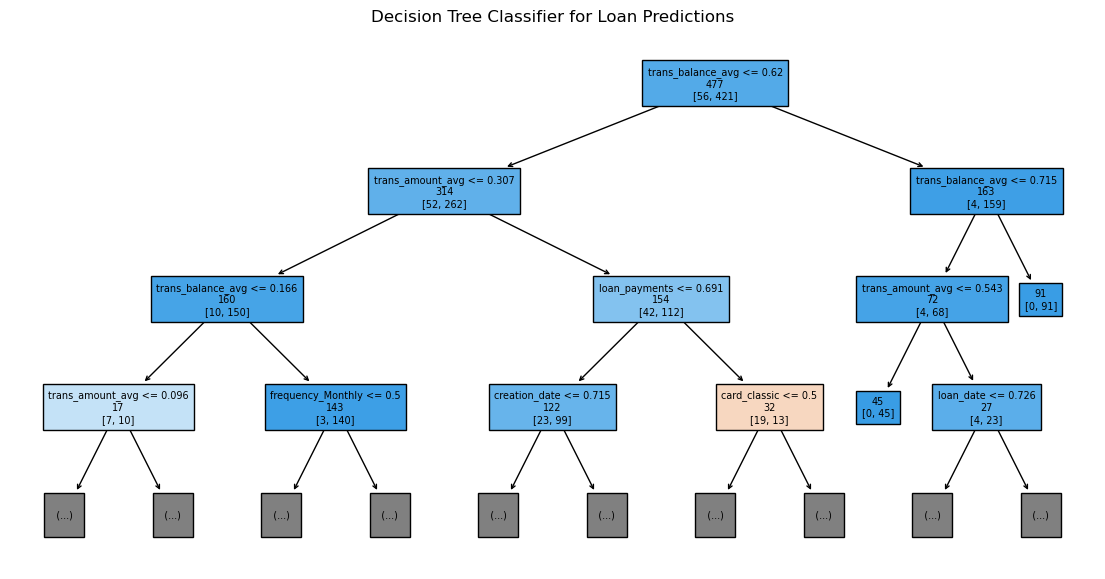

In [18]:
feature_names = np.concatenate([scaler.get_feature_names_out(), encoder.get_feature_names_out()])

# Only plot tree with max_depth=3 due to how large it is
plt.figure(figsize=(14,7))
plot_tree(clf, feature_names=feature_names, max_depth=3,
          filled=True, impurity=False, label="none", fontsize=7)
plt.title("Decision Tree Classifier for Loan Predictions")
plt.show()

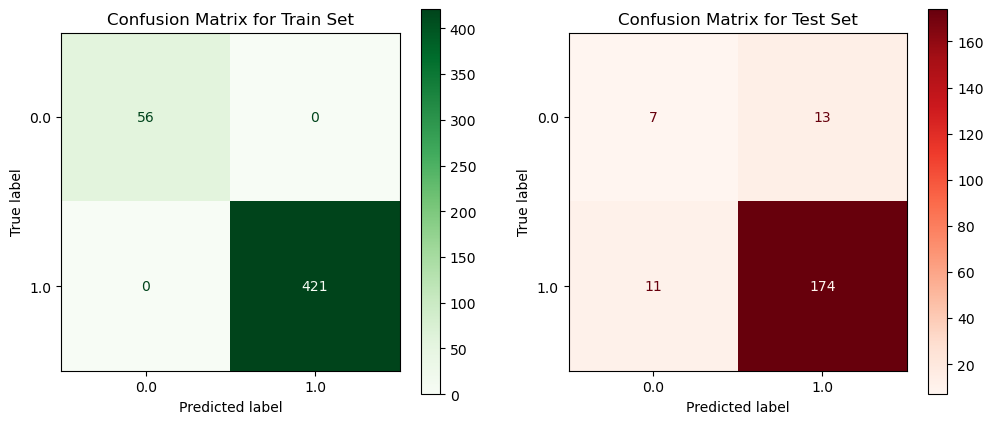

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(clf, X_train, y_train, cmap="Greens", ax=ax1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Reds", ax=ax2)

ax1.set_title("Confusion Matrix for Train Set")
ax2.set_title("Confusion Matrix for Test Set")
plt.show()

Decision tree to predict whether a loan should or should not be given to a certain client. Decision tree used as it is a classification problem with lots of inputs to learn from. Confusion matrices above show the accuracy of the model on the test set compared to the train set. The accuracy is about 87%-88%, which is high enough to be a useful model.

Whether someone will pay back a loan or not can depend on a multitude of factors outside of the bank's ability to monitor, so ethically this must be considered when using this model. This model could be used in a discriminatory manner due to the use of data such as gender and urban ratio, the ethics of this must be considered in its use.

## Task 4: Experimental Results and Analysis (25 Marks)

Given the **five** modelling solutions implemented above, analyse, discuss and present your findings to the key stakeholders of the bank.

Your answer should clearly cover the following:
* Present your findings in a clear and concise manner;
* Discuss your results in the context of the selected solution;
* Discuss how these results can help the bank in performing customer risk assessment and establishing customer retention strategies;
* Present the limitations (if any) of your solutions in a clear and concise manner.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

For establishing customer retention strategies, the first data analysed is the density of account creation dates.

![](img/model1.png)

This plot shows us two key groups, split by the minima shown in green at August 19, 1994. Customers who signed up on before this date should be considered for loyalty benefits for their long usage of the bank. This will help the bank retain customers by providing added benefits as their account ages. The limitation of this model is that it only considers account creation date, meaning frequency of account usage is not covered.

The next analysis is K-means clustering, to find clusters of high value client balance and when they were born.

![](img/model2.png)


There are 4 clusters found, providing insights into the ages of the highest value customers.

Next is a statistical test, looking into the total transaction value of a client, and the type of credit card they own.

![](img/model3.png)


After performing an ANOVA test, it was found that there is a significant difference between these parameters. Post hoc tests show that there is significant difference between junior and gold, and classic and gold credit card owners, with no difference between junior and classic. Therefore, extra focus should be directed towards retaining gold credit card owners due to the evidence suggesting that their value is higher.

The limitation of this test is that there is a 5% chance of a type I error, that there is not actually a significant difference.

Next is another statistical test, this time looking into the types of transactions and the season of the transactions.

![](img/model4.png)

After performing a chi-squared goodness of fit test on the data, it was found that there is a difference in the frequency of transaction types in different seasons. Post hoc tests show there is difference between winter and every other season, as well as between spring and summer. As visible in the bar chart, the trend in transaction type changes significantly in winter. Extra focus should be placed on the winter season regarding advertising and decisions made in the bank.

In this test, there is a 0.25% chance of a type I error, which is very low but still not impossible, so this is a potential limitation.

The fifth and final model is a classifier tree which predicts whether someone will fail to keep up payments of their loan.

![](img/model5tree.png)

This is a visual representation of the tree, shortened due to its complexity.

![](img/model5.png)

The tree is capable of predicting whether a client will fail to keep up payments of their loan with 87% to 88% accuracy, so can be used to perform risk assessment. The confusion matrices show how well it predicts the results.

The limitation of this model is that the accuracy is not perfect. Whether someone will pay back a loan or not can depend on a multitude of factors outside of the bank's ability to monitor. This model alone should not be used to decide whether to grant loans or not, but should be one part of a decision making process.

----
----

## Task 5: Conclusion (10 Marks)

Given the insights derived from Tasks 1-4, provide a conclusion that clearly covers the following:
* A summary of the main points;
* A discussion of the significance of your results;
* Any recommendation(s) resulting from your analysis;
* Any overall ethical considerations arising from the data analysis of this business domain.

**World Limit**: 300 words.

**Write your answer here (text cell(s) to be used, as appropriate)**

The bank has been given key insights which will inform decision making. Models have been presented which will help with risk assessment and identifying high value and loyal customers. The models demonstrate significant trends in data, in particular in account creation dates, client birth dates and balance, credit card types and transaction value, difference in transaction types in different seasons, and in predicting whether clients will pay their loan back successfully.

The bank should create a loyalty scheme using August 19, 1994 as a cutoff, giving loyalty benefits to accounts created before this date. The bank can in the future choose to move this date forward through similar analysis, or incrementing it daily. Increased loyalty bonuses can be given to gold credit card holders. This will improve customer retention.

The bank should consider the birth dates of their highest value customers in their decision making and advertising. For example, if the bank creates a new service or app, care should be taken to ensure they benefit from it to improve retention of these customers.

The bank should take into account the change in seasonal transaction types when making decisions during key seasons such as winter. The bank may also find this data significant enough to increase advertising and loyalty rewards during key seasons, to show appreciation for customers and improve retention.

The bank may use the loan prediction model to help decide whether to give loans to customers. It is important that the fact that models are not perfect is considered for ethical reasons when making such impactful decisions regarding people.

An overall ethical consideration is the fact that it is important to ensure fairness when using data analysis. Even though trends are useful, they are clients who do not fit the trends, and their needs should also be considered.

----
----

## Overall Academic Quality (10 Marks)
10 marks are allocated for the clarity and cohesiveness of your answers (both text and code) across all tasks with appropriate, relevant and effective analysis and presentation of the results.

## Deliverables

You should submit the following to the submission point on the teaching portal:

1. the SQLite database produced in Task 2;
2. the completed Jupyter notebook (both .ipynb and HTML files) that also includes the SQL statements (Task 2), the research design and its implementation (Task 3), and the analysis and presentation of your results (Task 4);
3. any figures or diagrams that are included in your answers in the Jupyter notebook.

For each task where text is required, we have provided guidelines above on the suggested word counts. Exceeding the word count will result in any work beyond the word count being disregarded when assessing.